In [3]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

In [4]:
from qiskit import *

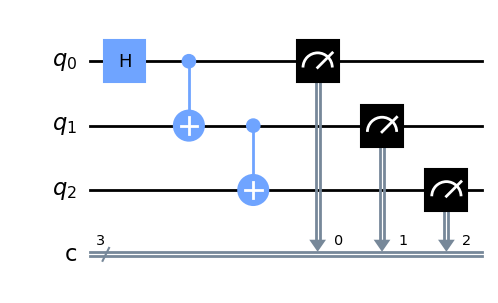

In [5]:
nqubits = 3
circuit = QuantumCircuit(nqubits, nqubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2],[0,1,2])
circuit.draw(output = "mpl")

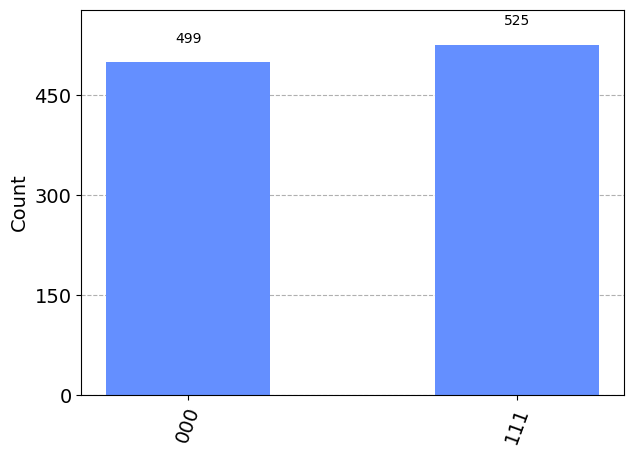

In [6]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit, backend = simulator, shots=1024).result()
plot_histogram(sim_result.get_counts(circuit))

In [8]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibm_brisbane')

ibmqfactory.load_account:WARNING:2023-10-19 12:57:53,569: Credentials are already in use. The existing account in the session will be replaced.


In [ ]:
job = execute(circuit, backend = device, shots=1024).result()
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

In [ ]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))

In [8]:
from qiskit.utils.mitigation import CompleteMeasFitter, complete_meas_cal

In [9]:
cal_circuits, state_labels = complete_meas_cal = complete_meas_cal(qr = circuit.qregs[0], circlabel = 'measerrormitigationcal')

/tmp/ipykernel_106/2248743722.py:1: DeprecationWarning: The function ``qiskit.utils.mitigation.circuits.complete_meas_cal()`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  cal_circuits, state_labels = complete_meas_cal = complete_meas_cal(qr = circuit.qregs[0], circlabel = 'measerrormitigationcal')
